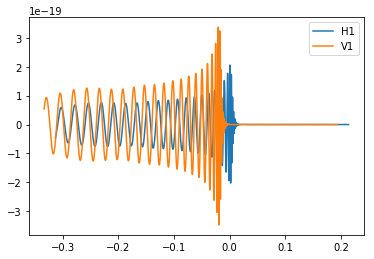

In [16]:
from pycbc.detector import Detector
from pycbc.waveform import get_td_waveform
import matplotlib.pyplot as plt 
import numpy as np

#GW source direction, polarization and inclination assignment
ra = 1.7 #Right_ascension
dec = 0 #Declination
pol = 0.2 #Polarization
inc = 0 #Inclination

h = Detector("H1") #Let h = LIGO Hanford
v = Detector("V1") #Let v = Virgo


# Generate a wavefrom
hp, hc = get_td_waveform(approximant="IMRPhenomPv2", mass1=20, mass2=20,
                         f_lower=40, delta_t=1.0/4096, inclination=inc,spin1z=0.5,spin2z=0.5)

hth = h.project_wave(hp, hc, ra, dec, pol) #Project waveform to LIGO Hanford
htv = v.project_wave(hp, hc, ra, dec, pol) #Project waveform to Virgo

plt.plot(np.array(hth.sample_times[6100:]), np.array(hth[6100:]), label = 'H1')
plt.plot(np.array(htv.sample_times[6100:]), np.array(htv[6100:]), label = 'V1')
plt.legend()
plt.show()